In [89]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from utils import plot_bar, plot_line, plot_hist

# Simulation

## Why is it so useful and important for statistics and research?

Simulation is a very useful tool for statistics / data analysis and research in general. Some reasons for this are:

- **solve probability problems**: use numerical approaches rather than analytical approaches

- **calculate features of probability densities**: calculating features of probability densities involves integration. Instead we could draw a randomly from that density and just calculate the feature from the sampled data. 

    > Example:
    > - what is the variance of a random variable that is described by a $\text{Beta}(\alpha=3,\beta=6)$ distribution?
    > - if we don't know the formula for this we can simply draw from this distribution (e.g. 1.000 times)
    > - we then calculate the variance of our randomly sampled data
  

- **understand the assumed data generation process**: simulate data from a proposed model to get a feel for the data
   

- **evaluating estimators**: estimator $\approx$ function of the data. How do we know if model is well specified and appropriate for our model? We can simulate a world, randomly draw data from that world and apply our function to that data. We can then check if we get the right estimator. 

    > Example:
    > - create world: $y = 5 + 17 x + \epsilon$, where: $\epsilon = N(0,\sigma^2)$
    > - randomly draw data from world: $x = \text{1.000 random numbers}$ $\implies y $
    > - estimate linear regression function and check if parameters $\beta_0$ and $\beta_1$ can be recovered / are what we expect (i.e. if a linear regression model is well specified for our data)


**Overall:** simulation is a very useful and powerful tool to solve complex problems without using complex math. This is especially true when dealing with probability given humans do not have a good intuition for probabilities.

## Introduction to simulation with `numpy`

In `python` there are numerous ways to simulate data.

Let's look at some easy simulation examples using `numpy`. Specificall, we need to use:

- `np.random`

In [2]:
# Randomly draw one number between 1 and 6 
np.random.randint(1,7) # note: upper bound is exclusive

5

In [3]:
# Randomly draw 1.000 numbers between 1 and 6
data = np.random.randint(1,7,size=1_000)
data[:10] # show first 10

array([2, 5, 5, 6, 1, 2, 3, 2, 5, 1])

Let's look at a typical highschool / undergradiuate probability problem and solve it via simulation:

a. You roll one dice $8x$. What is the probability of $4$ sixes?

b. You roll two dices once. What is the probability that the sum of eyes is 7?

c. You make three draws (with replacement) from a Urn holding 20 red, 30 blue, 8 green balls. What is the probability of getting no blue ball?

You can solve this problems mathematically (i.e. analytically). However, we will use simulation to answer the questions

**a. What is the probability of 4 sixes out of 8 rolls?**

In [4]:
n = 100
rolls = 8
data = np.random.randint(1,7,size=(n,rolls)) # draw n samples of 8 rolls

In [5]:
sixes = np.sum(data == 6, axis=1) # determine the number of sixes in each sample (i.e. each 8 rolls)
sixes[:10] # show first 10 samples

array([2, 0, 1, 1, 2, 0, 1, 3, 2, 2])

In [6]:
exactly_four = sum(sixes == 4) / n  # determine number of sixes that are equal to 4 and divide by number of samples (to get probability)
exactly_four

0.02

With higher $n$ the probability will converge to the analytical correct probability which is:

$$P(X = 4) = \binom{8}{4}\frac{1}{6}^4(1-\frac{1}{6})^{8-4} \approx 2.6048\%$$

**b. What is the probability of two dices summing to 7?**

In [7]:
n = 100
dice = 2
data = np.random.randint(1,7,size=(n,dice))
data[:10]

array([[3, 4],
       [1, 1],
       [5, 5],
       [1, 6],
       [6, 1],
       [2, 4],
       [4, 3],
       [2, 2],
       [2, 5],
       [3, 6]])

In [8]:
sum_eyes = np.sum(data,axis=1)
sum_eyes[:10]

array([ 7,  2, 10,  7,  7,  6,  7,  4,  7,  9])

In [9]:
sum(sum_eyes == 7) / n

0.2

With higher $n$ the probability will converge to the analytical correct probability. Here two dices sum up to $7$ with the following combinations:

- 1, 6
- 6, 1
- 2, 5
- 5, 2
- 3, 4
- 4, 3

with are $6$ combinations out of $36$ total possibilities. Therefore the analytical correct solution is $\frac{6}{36} \approx 16.7\%$

**What is probability of no blue ball with three draws?**

So far we had assumed equally probabilities for each possible event. Now we need to introduce different probabilities of a specific event occuring

- red = 20/58
- blue = 30/58
- green = 8/58

We can model this easily using `numpy.random` by passing an additional argument `p` (for probability)

In [10]:
n = 100000
draws = 3
probs = [20/58, 30/58, 8/58] # With replacement
data = np.random.choice(["red","blue","green"],size=(n,draws),p=probs)
data[:10]

array([['blue', 'red', 'red'],
       ['green', 'red', 'blue'],
       ['blue', 'blue', 'green'],
       ['blue', 'blue', 'blue'],
       ['blue', 'red', 'blue'],
       ['blue', 'red', 'blue'],
       ['red', 'red', 'green'],
       ['green', 'blue', 'blue'],
       ['red', 'red', 'blue'],
       ['blue', 'red', 'blue']], dtype='<U5')

In [11]:
num_blues = np.sum(data == "blue",axis=1)
sum(num_blues == 0) / n

0.11271

With higher $n$ the probability will converge to the analytical correct probability. Here we have $58^3$ possible combinations to draw. Drawing no blue ball has possible combinations of $28^3$. Therefore the analytical solution is:

$$P(\text{no blue}) = \frac{28^3}{58^3} \approx  11.25\%$$

## Solve probability problems

Let's look at different and more relevant problems. 

Assume that you want to buy a used book from an online retailer. The book is offered from a resellers with the following reviews:

- Seller A: 100% positive ratings; 10 total ratings

- Seller B: 96% positive ratings; 50 total ratings

The % of positive rating observed is likely not to be the real positive rating %. 

Assuming the real positive ratings are 95% for both sellers

- how likely are the above rating observations?

- plot a histogram with the distribution of positivity ratings (use: plot_hist() for this)


(Note: this example is inspired by [John Cook](https://www.johndcook.com/blog/2011/09/27/bayesian-amazon/) and [3Blue1Brown](https://www.youtube.com/watch?v=8idr1WZ1A7Q&feature=youtu.be))

In [12]:
n = 100000
s = 0.95
ks = [10,50]
obs = [10,48]
for k,o in zip(ks, obs):
    data = np.random.choice([1,0],p=[s,1-s],size=(n,k))
    sums = np.sum(data,axis=1)
    print("Probability of observing", o,"/",k," = ", sum(sums==o) / n)

Probability of observing 10 / 10  =  0.60163
Probability of observing 48 / 50  =  0.26106


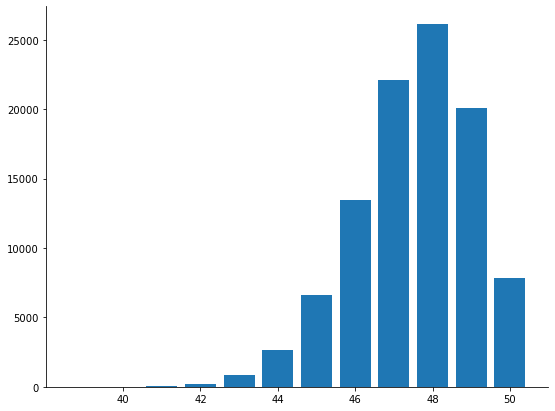

In [13]:
plot_hist(sums);

### Example: Monthe Hall Problem

The problem is loosely based on the American TV (game) show *Let's Make a Deal* and is named after its original host, Monty Hall. 

The problem became very famous as a quesiton from a reader's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in a US magazine in 1990. 

The question was as follows:

> Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

### The Problem

There are 3 doors in front of you, and there is a prize behind one of them (a brand new car!).
Once you select a door, the moderator will open one of the two you had not selected which does not have a prize behind it.
You will then have the opportunity to switch from the door you originally selected to an alternate door.

Here are some examples

| Door 1 | Door 2 | Door 3 | Monte Hall opens... | Result from Switch | Result from stay |
|:------:|:------:|:------:|:------------------------:|:------------------:|:----------------:|
|   Car  |  Goat  |  Goat  |        Door 2 or 3       |        Goat        |        Car       |
|  Goat  |   Car  |  Goat  |          Door 3          |         Car        |       Goat       |
|  Goat  |  Goat  |   Car  |          Door 2          |         Car        |       Goat       |

**Question** Is it  better to switch or to stay with your initial choice? (Assuming you want to win the car!)

The problem became so famous because Vos Savant's response was that the contestant should switch to the other door because switching would give you a probability of $\frac{2}{3}$ of winning the car. Many famous mathematicians disputed the result but it turns out that under the above assumptions the answer is actually correct. See [here](https://en.wikipedia.org/wiki/Monty_Hall_problem) for more infos regarding the problem. 

#### Solution to Monte Hall Problem using simulation

In [14]:
n = 1000
win_no_switch = 0
win_switch = 0

for i in range(n):
    doors = [1,2,3]
    win_door = np.random.choice(doors)
    choice = np.random.choice(doors)
    if win_door == choice: # 1/3
        win_no_switch += 1
    doors_left = doors[:]
    doors_left.remove(choice)
    if any(win_door == doors_left):
        win_switch += 1
print("Prob(Car | Switch) = ", win_switch/n)
print("Prob(Car | No Switch) = ", win_no_switch/n)

Prob(Car | Switch) =  0.669
Prob(Car | No Switch) =  0.331


### Example: Birthday Problem

The birthday problem or birthday paradox concerns the probability that, in a set of $n$ randomly chosen people, some pair of them will have the same birthday. The problem is a good example that assessing probabilities is often difficult and results are often non-intuitive. 

**Question**: Given a room with 23 randomly selected people, what is the probability that at least two have the same birthday?

#### Solution to Birthday Problem

In [90]:
def simulate_birthdays(n,group_size):
    same_day = 0
    alldays = np.arange(1,366,1)
    for i in range(n):
        bdays = np.random.choice(alldays,size=group_size,replace=True)
        if len(bdays) != len(set(bdays)):
            same_day += 1
    return same_day / n

In [91]:
n = 100000
group_size = 23
simulate_birthdays(n,group_size)

0.50574

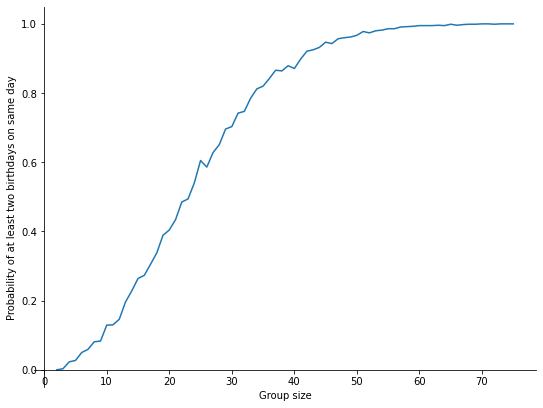

In [92]:
n = 1000
ks = 75
prob_by_group_size = [simulate_birthdays(n,s) for s in np.arange(2,ks+1,1)]
fig, ax = plot_line(np.arange(2,ks+1),[prob_by_group_size], zero_origin=True, xlabel="Group size",ylabel="Probability of at least two birthdays on same day");